# Dimensionality Reduction Techniques

In many real life examples, even though data seems to like a higher dimensional space, they actually lie in a lower dimensional
space. If we can make use of this property and bring the data to a lower dimensional space, processing of the data will be a lot
easier. Below are some examples.

<img src='./dim1.png'>

<img src='dim2.jpg'>

Here, the data lies in a manifold and  using non-linear dimensionality reduction techniques, we can bring data to a lower dimension.

<img src='./dim3.jpg' width='500' height='400'>

Now, let us see an example.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Case 1 :  Mean zero & Covariance Matrix diagonal

[[10, 0], [0, 0.1]]


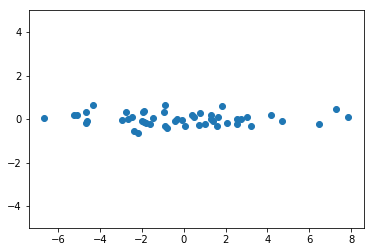

In [30]:
mean = [0,0]
C = [[10,0],[0,0.1]]
X = np.random.multivariate_normal(mean,C,size=50)
plt.scatter(X[:,0],X[:,1])
plt.ylim([-5,5])
print(C)

Error :  11.183166842912533


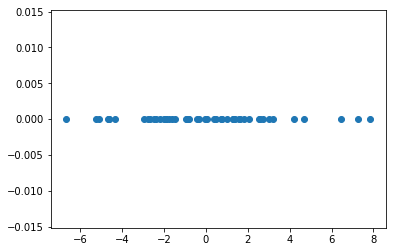

In [31]:
plt.scatter(X[:,0],np.zeros((1,50)))
print('Error : ',np.sum(np.abs(X[:,1])))

#### Case 2: Mean not zero, covariance diagonal

[[10, 0], [0, 0.1]]
Error :  97.76751880461298


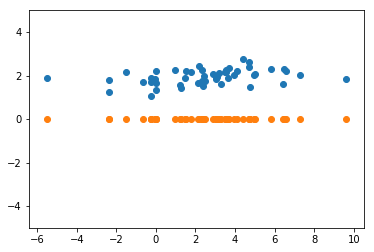

In [32]:
mean = [2,2]
C = [[10,0],[0,0.1]]
X = np.random.multivariate_normal(mean,C,size=50)
plt.scatter(X[:,0],X[:,1])
plt.ylim([-5,5])
print(C)
plt.scatter(X[:,0],np.zeros((1,50)))
# plt.scatter(np.zeros((1,50)),X[:,1])
print('Error : ',np.sum(np.abs(X[:,1])))

#### What if the co-variance matrix is not exactly diagonal?

#### Case 3: Mean zero,  Covariance Not diagonal

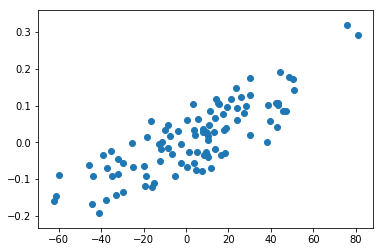

In [33]:
mean = [0,0]
C = [[900,2.5],[2.5,0.01]]
X = np.random.multivariate_normal(mean,C,size=100)
plt.scatter(X[:,0],X[:,1])
#plt.xlim([-50,100])

#### How to find the axis with maximum variance?

This can be done using eigen decomposition. If C is covariance matrix , eigen decomposition can be written as :
    $ C = VDV^T$ where columns of V are the eigen vectors and D the diagonal matrix of eigen values.
    The transformed axes can be obtained by $XV$.
    Eigen vectors are called the principal components.
    Eigen values represent the amount of variances along the respective eigen vectors.

In [34]:
eig_vals, eig_vecs = np.linalg.eig(C)
eig_vals

array([9.00006944e+02, 3.05553198e-03])

In [35]:
eig_vecs

array([[ 0.99999614, -0.00277778],
       [ 0.00277778,  0.99999614]])

Error :  4.51653341753973


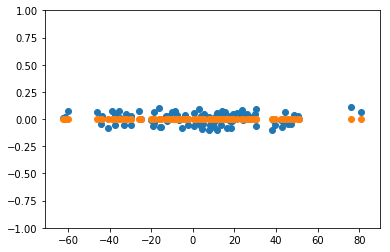

In [36]:
Y = np.matmul(X,eig_vecs)
plt.scatter(Y[:,0],Y[:,1])
plt.ylim([-1,1])
plt.scatter(Y[:,0],np.zeros((1,100)))
print('Error : ',np.sum(np.abs(Y[:,1])))

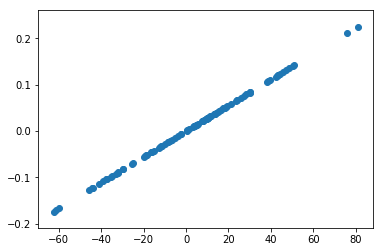

In [37]:
Y[:,0].shape
Y_proj = np.column_stack((Y[:,0],np.zeros((100,1))))
Y_deproj = np.dot(Y_proj,eig_vecs.T)
plt.scatter(Y_deproj[:,0],Y_deproj[:,1])

#### But what if the data is higher-dimensional ?

In [38]:
mean = [2,2,2,2,2,2,2]
C = np.diag([1000,400,100,50,2,0.01,0.005])
X = np.random.multivariate_normal(mean,C,size=100)
# X = X-mean

In [39]:
eig_vals, eig_vecs = np.linalg.eig(C)
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

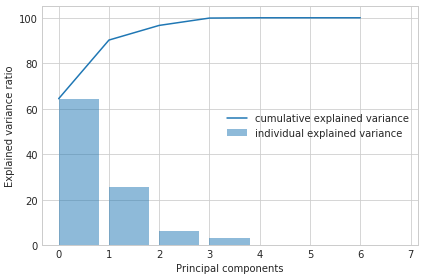

In [40]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), var_exp, alpha=0.5, align='edge',
            label='individual explained variance')
    plt.plot(range(7), cum_var_exp,# where='mid',
            label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

#### PCA is a unsupervised method for dimensionality reduction in data in which we select the principal components which have higher variances.

Q. How many components are required to get a variance around 85 percent?

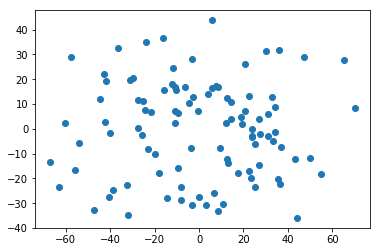

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
y = pca.fit_transform(X)
plt.scatter(y[:,0],y[:,1])

Here , PCA is used as a visualization tool.

#### Digit Classification Using PCA

In [42]:
import os, struct
from array import array

def read_mnist(digits, dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')

    flbl = open(fname_lbl, 'rb')
    magic_nr, size = struct.unpack(">II", flbl.read(8))
    lbl = array("b", flbl.read())
    flbl.close()

    fimg = open(fname_img, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = array("B", fimg.read())
    fimg.close()

    ind = [ k for k in range(size) if lbl[k] in digits ]
    images =  np.zeros((len(ind),rows*cols))
    labels = np.zeros((len(ind),1))
    for i in range(len(ind)):
        images[i, :] = img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]
        labels[i] = lbl[ind[i]]

    return images, labels
x_digits_train,l_train = read_mnist([0,1],'training','.')
x_test,l_test = read_mnist([0,1],'testing','.')

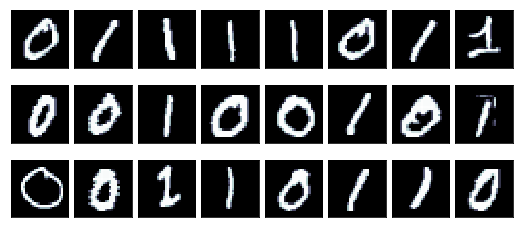

In [43]:
x_digits_train.shape,l_train.shape
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_digits_train[i].reshape(28, 28), cmap='bone')

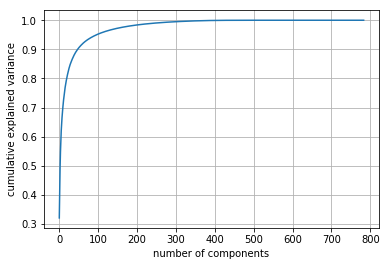

In [44]:
pca = PCA().fit(x_digits_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()

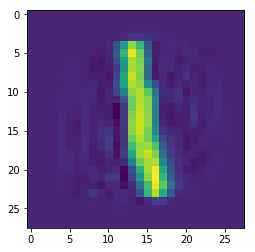

In [45]:
pca = PCA(n_components=100).fit(x_digits_train)
x_digits_train_proj = pca.transform(x_digits_train)
x_digits_train_reproj = pca.inverse_transform(x_digits_train_proj)
x_digits_train_reproj_reshaped = x_digits_train_reproj.reshape(x_digits_train_proj.shape[0],28,28)
plt.imshow(x_digits_train_reproj_reshaped[2])

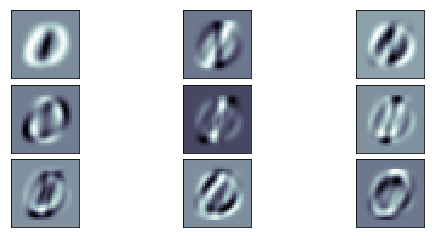

In [46]:
fig, axes = plt.subplots(3, 3, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(28, 28), cmap='bone')

### Exercise: Digit Classification using Logistic Regression

In [47]:
print(x_digits_train_proj.shape)
print(l_train.shape)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
clf = model.fit(x_digits_train_proj, l_train)

print("Train set score: {:.3f}".format(clf.score(x_digits_train_proj, l_train)))

(12665, 100)
(12665, 1)
Train set score: 1.000


## Noise Filtering using PCA

PCA can also be used as a filtering approach for noisy data. If you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

[[10, 0], [0, 0.1]]
Error before projection:  227.16493527233942


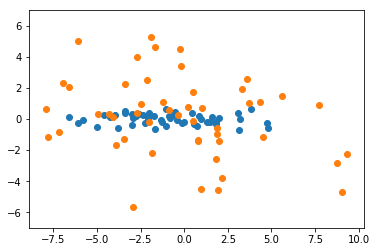

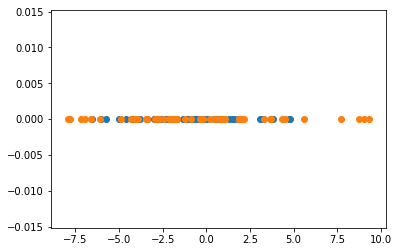

In [48]:
mean = [0,0]
C = [[10,0],[0,0.1]]
X = np.random.multivariate_normal(mean,C,size=50) 
X_noisy = X + 3 * np.random.randn(50,2)
plt.scatter(X[:,0],X[:,1])
plt.scatter(X_noisy[:,0],X_noisy[:,1])
plt.ylim([-7,7])
print(C)
plt.figure()
plt.scatter(X[:,0],np.zeros((1,50)))
plt.scatter(X_noisy[:,0],np.zeros((1,50)))
print('Error before projection: ',np.sum(np.abs(X_noisy-X)))
# print('Error after projection: ',np.sum(np.abs(X_noisy[:,0]-X[:,0])))

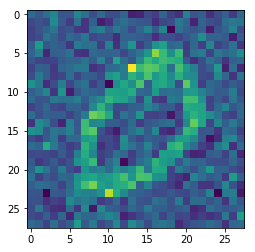

In [49]:
np.random.seed(42)
noisy = np.random.normal(x_digits_train, 80)
noisy_reshaped = noisy.reshape(x_digits_train.shape[0],28,28)
plt.imshow(noisy_reshaped[0])

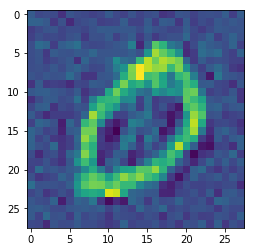

In [50]:
pca = PCA(0.5).fit(noisy)
x_digits_train_proj = pca.transform(noisy)
x_digits_train_proj = pca.inverse_transform(x_digits_train_proj)
x_digits_train_proj = x_digits_train_proj.reshape(x_digits_train_proj.shape[0],28,28)
plt.imshow(x_digits_train_proj[0])

In [51]:
pca.n_components_

135

### Faces Dataset

In [52]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [53]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(faces.data)


PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

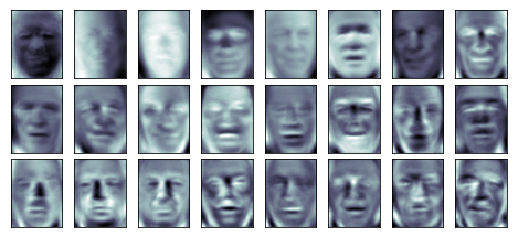

In [54]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

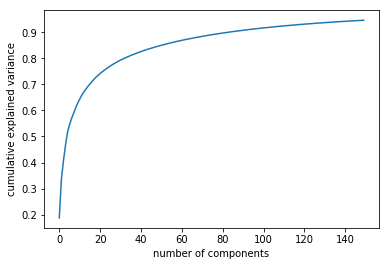

In [55]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [56]:
pca = PCA(150).fit(faces.data)
projected = pca.transform(faces.data)
re_projected = pca.inverse_transform(projected)
re_projected.shape


(1348, 2914)

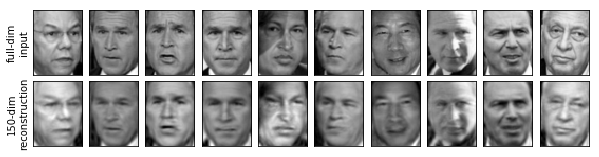

In [57]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(re_projected[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');



In [58]:
eig_faces = pca.components_.reshape(-1,62, 47)

In [59]:
mean_face = np.mean(faces.images,0).reshape(62,47)

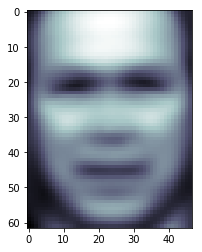

In [60]:
plt.imshow(mean_face,cmap='bone')

### Face Generation

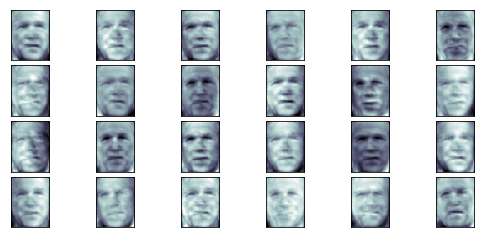

In [61]:
unique_pic = [np.where(faces.target==3)for n in np.arange(1348)][0]

bush_images  = faces.data[np.squeeze(unique_pic),:]
pca = PCA(n_components=10,whiten=True)
pca.fit(bush_images)
bush_projected = pca.transform(bush_images)
bush_reprojected = pca.inverse_transform(bush_projected)


coef_matrix = np.dot(bush_reprojected,pca.components_.T)
mean = np.mean(coef_matrix,axis =0)
var = np.var(coef_matrix,axis=0)
covar_matrix = np.diag(var)
new_coef = np.random.multivariate_normal(mean,covar_matrix,36)

newface = np.dot(new_coef,pca.components_)

fig, axes = plt.subplots(4, 6, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(newface[i].reshape(62, 47), cmap='bone')


### Linear Discriminant Analysis

### Why PCA fails ?

(0, 7)

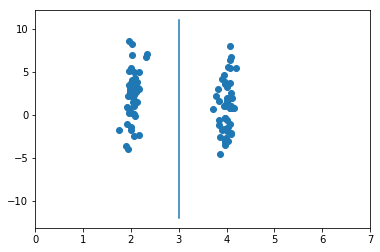

In [62]:
mean = [[2,2],[4,2]]
C = [[0.01,0],[0,10]]
X1 = np.random.multivariate_normal(mean[0],C,size=50)
X2 = np.random.multivariate_normal(mean[1],C,size=50)
X = np.concatenate((X1,X2))
y = np.concatenate((np.zeros(50),np.ones(50)))
plt.scatter(X[:,0],X[:,1])
plt.plot(3*np.ones(24),range(-12,12))
plt.xlim([0,7])

In [63]:
pca = PCA(1).fit(X)
X_transform = pca.transform(X)

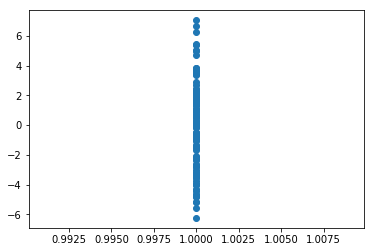

In [64]:
plt.scatter(np.ones(100),X_transform)

(0, 7)

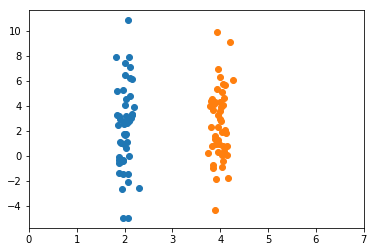

In [65]:
mean = [[2,2],[4,2]]
C = [[0.01,0],[0,10]]
X1 = np.random.multivariate_normal(mean[0],C,size=50)
X2 = np.random.multivariate_normal(mean[1],C,size=50)
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])

plt.xlim([0,7])

#### Q. How to reduce the dimension retaining the class separation?

 For this we use LDA. In contrast to PCA, LDA is “supervised” and computes the directions (“linear discriminants”) that will represent the axes that that maximize the separation between multiple classes.

In LDA, we try to maximise the interclass variance and minimize the intra-class variance. This is an optimisation problem.

#### Clasification with LDA

In [66]:
X = np.concatenate((X1,X2))
y = np.concatenate((np.zeros(50),np.ones(50)))
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2).fit(X,y)

In [67]:
X_tranf = lda.transform(X)
X_tranf.shape

(100, 1)

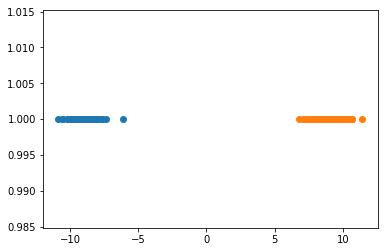

In [68]:
plt.scatter(X_tranf[0:50],np.ones(50))
plt.scatter(X_tranf[50:100],np.ones(50))

#### Example :  Two Class Classification using PCA & LDA

In [69]:
import os
import skimage.io as io
import skimage.color as clr
dir0 = './reception'
dir1 = './igloo'

list0 = os.listdir(dir0)
list1 = os.listdir(dir1)
# list1 = use listdir to list files in dir1

def rgb2gray(rgb):
    
    if len(rgb.shape) == 3:
        r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
        gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
        return gray
    else: 
        return rgb

X0 = []
X1 = []
for i in range(len(list0)):
    temp1 = io.imread(os.path.join(dir0,list0[i]))
    temp = clr.rgb2gray(temp1)
    X0.append(temp)
X_0 = np.asarray(X0,dtype = np.uint8)

for i in range(len(list1)):
    temp1 = io.imread(os.path.join(dir1,list1[i]))
    temp = clr.rgb2gray(temp1)
    X1.append(temp)
X_1 = np.asarray(X1, dtype = np.uint8)

In [70]:
# create a vector of '0' using np.zeros of size = number of samples in X_0 
y_0 = np.zeros([X_0.shape[0],1])

# create a vector of '1' using np.ones of size = number of samples in X_1
y_1 = np.ones([X_1.shape[0],1])



In [71]:
X = np.concatenate([X_0,X_1],axis=0)
y = np.concatenate([y_0,y_1],axis=0)
X.shape

(1000, 256, 256)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
X_downsampled = []
for i in range(X.shape[0]):
    downsampled_image = np.resize(X[i], [128, 128])
    X_downsampled.append(downsampled_image)
X_downsampled = np.array(X_downsampled)
X_downsampled = X_downsampled.reshape((X_downsampled.shape[0],128*128))
print(X_downsampled.shape)

trainX, testX, trainY, testY = train_test_split(X_downsampled, y, train_size=0.8, random_state=0)
clf = LogisticRegression()
clf.fit(trainX,trainY)

pred= clf.predict(testX)

print("Score for Logistic Regression : {}".format(clf.score(testX,testY)))

(1000, 16384)
Score for Logistic Regression : 0.39


In [73]:
X_reshaped = np.reshape(X,[X.shape[0],-1])

In [74]:
pca = PCA(n_components=100)
pca.fit(X_reshaped)
transform = pca.transform(X_reshaped)
print("Transformed data shape = ",transform.shape)

Transformed data shape =  (1000, 100)


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
trainX, testX, trainY, testY = train_test_split(transform, y, train_size=0.8, random_state=0)

clf = LogisticRegression()
clf.fit(trainX,trainY)

pred= clf.predict(testX)

print("Score for Logistic Regression : {}".format(clf.score(testX,testY)))

Score for Logistic Regression : 0.445


In [76]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_reshaped,y)
transform = lda.transform(X_reshaped)
print("Transformed data shape = ",transform.shape)

Transformed data shape =  (1000, 1)


In [77]:
trainX, testX, trainY, testY = train_test_split(transform, y, train_size=0.8, random_state=0)

clf = LogisticRegression()
clf.fit(trainX,trainY)

pred= clf.predict(testX)

print("Score for Logistic Regression : {}".format(clf.score(testX,testY)))

Score for Logistic Regression : 0.89
